In [ ]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt

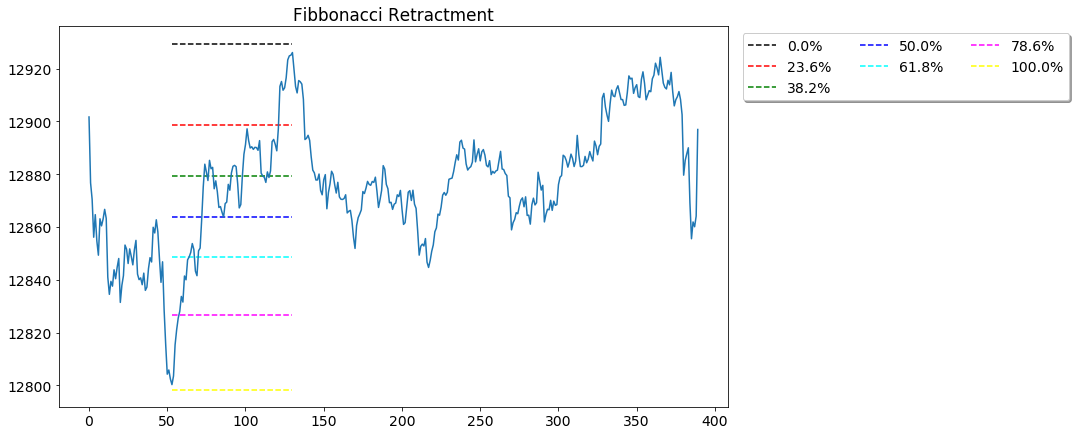

In [4]:
# FIBBONACCI RETRACTMENT
##################################################################################

symbol = "^ndx"
#symbol = "bz=f"

ticker = yfinance.Ticker(symbol)
df = ticker.history(interval="1m", period = "1d")

df2 = df

df = df.reset_index()
df['Datetime'] = pd.to_numeric(pd.to_datetime(df['Datetime']))

###################################################################################

highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
    if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]):
        highest_swing = i
    if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]):
        lowest_swing = i
        
##################################################################################

ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]
for ratio in ratios:
    if highest_swing > lowest_swing: # Uptrend
        levels.append(max_level - (max_level-min_level)*ratio)
    else: # Downtrend
        levels.append(min_level + (max_level-min_level)*ratio)
        

##################################################################################

start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

plt.plot(df['Close'])

plt.hlines(levels[0],start_date, end_date,label="{:.1f}%".format(ratios[0]*100),colors='black', linestyles="dashed")
plt.hlines(levels[1],start_date, end_date,label="{:.1f}%".format(ratios[1]*100),colors='r', linestyles="dashed")
plt.hlines(levels[2],start_date, end_date,label="{:.1f}%".format(ratios[2]*100),colors='g', linestyles="dashed")
plt.hlines(levels[3],start_date, end_date,label="{:.1f}%".format(ratios[3]*100),colors='b', linestyles="dashed")
plt.hlines(levels[4],start_date, end_date,label="{:.1f}%".format(ratios[4]*100),colors='cyan', linestyles="dashed")
plt.hlines(levels[5],start_date, end_date,label="{:.1f}%".format(ratios[5]*100),colors='magenta', linestyles="dashed")
plt.hlines(levels[6],start_date, end_date,label="{:.1f}%".format(ratios[6]*100),colors='yellow', linestyles="dashed")

plt.title('Fibbonacci Retractment')

plt.legend(loc='best', bbox_to_anchor=(1.52, 1.0),
          ncol=3, fancybox=True, shadow=True)



##################################################################################

In [6]:
df2.reset_index(inplace=True)
df2['Datetime'] = pd.Series([val.time() for val in df2['Datetime']])
df2


,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,09:30:00,12900.29,12901.66,12888.00,12901.66,0,0,0
1,09:31:00,12897.87,12897.87,12876.71,12876.71,13820380,0,0
2,09:32:00,12873.00,12881.12,12869.96,12870.44,3810387,0,0
3,09:33:00,12868.16,12874.61,12855.98,12856.12,1927754,0,0
4,09:34:00,12859.72,12869.37,12859.72,12864.67,2326552,0,0
...,...,...,...,...,...,...,...,...
385,15:55:00,12866.48,12866.48,12855.54,12855.54,6797530,0,0
386,15:56:00,12856.52,12861.90,12855.32,12861.90,6647948,0,0
387,15:57:00,12863.37,12865.18,12860.08,12860.08,2391736,0,0
388,15:58:00,12858.86,12864.12,12857.13,12864.12,4781724,0,0


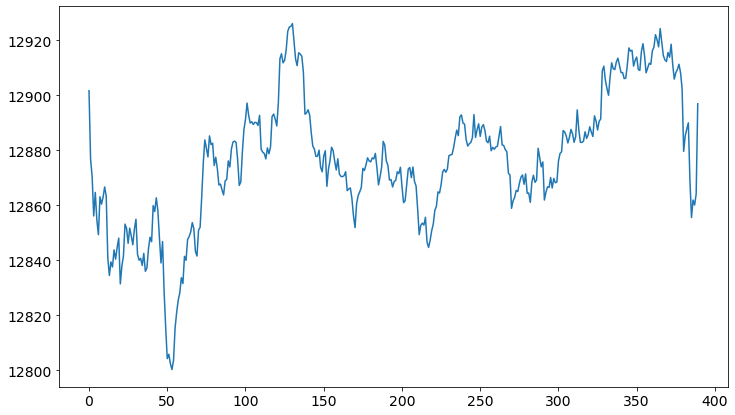

In [7]:
plt.plot(df2['Close'])

In [8]:
df2.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')